#  Digit Classification  using KNN
### By Sai Sangavi C

### Objective :

To create an ML model for classifying a handwritten digit

### Abstract :

In this project we used the K-Nearest Neighbor classifier as our ML model to distinguish our handwritten digit. 
 
MNIST dataset is used for training and testing the model

### Implementation

Initially we import all our required packages 

In [59]:
from matplotlib import pyplot as plt

import numpy as np

import tensorflow as tf

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , accuracy_score

import seaborn as sns

#### Fetching our dataset from the tensorflow

In [5]:
data=tf.keras.datasets.mnist

(train_image,train_label),(test_image,test_label)=data.load_data()

#### Next we are analysing the data which helps us to make our model better

In [36]:
train_shape=np.shape(train_image)

test_shape=np.shape(test_image)

train_len=train_shape[0]

test_len=test_shape[0]

print(f'Total training samples: {train_len}')

print(f'Total testing samples: {test_len}')

print(f'Dimension of the training data : {train_shape[1]} * {train_shape[2]}')

print(f'Dimension of the training data : {test_shape[1]} * {test_shape[2]}')

label = list(set(train_label))

print(f'Total number of classes are : {len(label)}')

print(f'Classes are : {label}')

print(f'Max value in the Data : {train_image.max()}')

Total training samples: 60000
Total testing samples: 10000
Dimension of the training data : 28 * 28
Dimension of the training data : 28 * 28
Total number of classes are : 10
Classes are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Max value in the Data : 255


#### Visualizing a data from each class

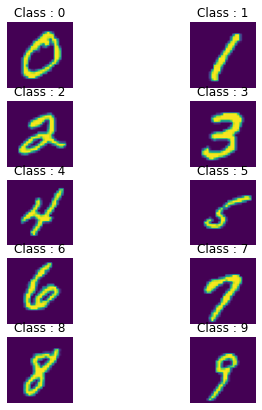

In [41]:
i=0

j=0

rows,columns = 5,2

fig = plt.figure(figsize=(6, 7))

while i>-1:
    
    if label[j] == train_label[i]:
        
        fig.add_subplot(rows, columns, j+1)
        
        plt.imshow(train_image[i])
        
        plt.axis('off')
        
        plt.title("Class : "+str(label[j]))
        
        j+=1
        
    if j ==len(label):
        
        break
        
    i+=1

#### Since image is a 2-D and we use KNN , image should to converted into 1-D to process 
#### the data in KNN. So, we reshape the image data of 2-D to 1-D.

In [47]:
train_img=[]

for i in range(len(train_image)):
    
    train_img.append(train_image[i].flatten())
    
test_img=[]

for i in range(len(test_image)):
    
    test_img.append(test_image[i].flatten())
    
print('After reshaping we get a 1-D array of the image that is of size : ',*np.shape(train_img[0]))

print('Each value in this array refers to the each pixel present in the image')

After reshaping we get a 1-D array of the image that is of size :  784
Each value in this array refers to the each pixel present in the image


#### Since our values in the image array is high , we need to normalize it to optimize our model by dividing 
#### all the values in the array with the max value 255 which makes data values in the range of 0 to 1

In [91]:
train_img=np.array(train_img)/255

test_img=np.array(test_img)/255

print('Now we can see that our data is normalized')

train_img[0]

Now we can see that our data is normalized


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

#### Next we created a object for KNN model with neighbors and then we train our model

In [123]:
neigh = KNeighborsClassifier(n_neighbors=3,p=1)

neigh.fit(train_img,train_label)

KNeighborsClassifier(n_neighbors=3, p=1)

#### Now we test the model and using confusion matrix we are analyzing how our model is performed 
#### and then we are calculating the accuracy

In [124]:
predicted_labels = neigh.predict(test_img)

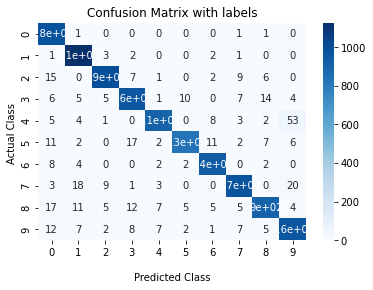

From the image collection of 10000 digits, our model predicted 9568 digits correctly.


In [125]:
cm = confusion_matrix(test_label, predicted_labels)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels')

ax.set_xlabel('\nPredicted Class')

ax.set_ylabel('Actual Class ')

ax.xaxis.set_ticklabels(label)

ax.yaxis.set_ticklabels(label)

plt.show()

true_predicted=np.trace(cm)

print(f'From the image collection of {len(test_label)} digits, KNN model predicted {true_predicted} digits correctly.')

In [128]:
acc=accuracy_score(test_label, predicted_labels)
print(f'Accuracy of the model : {acc} %')

Accuracy of the model : 0.9568 %
